# Lista 1

In [1]:
import sys
sys.path.append('..')
from fractions import Fraction

from IPython.display import display, Math
import numpy as np
import pandas as pd
from scipy.special import factorial, comb
from scipy.integrate import simpson, cumulative_trapezoid
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from utils.math import gaussian, loggaussian, uniform_prior, jeffreys_prior, safe_exp, normalize

## Questão 1

Seja $H = \{\text{a pessoa está doente}\}$, $D = \{\text{o teste deu positivo}\}$ e os seus respectivos complementares. Usando essa notação, definimos $FP = \mathbb{P}(D | \overline{H})$ a taxa de falsos positivos, $FN = \mathbb{P}(\overline{D}| H)$ a taxa de falsos negativos, e $p = \mathbb{P}(H)$ a informação priori, que é a taxa de incidência da doença na população. O teorema de Bayes nos diz que

\begin{align*}
\mathbb{P}(H | D) &= \frac{\mathbb{P}(D| H) \mathbb{P}(H)}{\mathbb{P}(D)}\\
&= \frac{\mathbb{P}(D| H) \mathbb{P}(H)}{\mathbb{P}(D | \overline{H})\mathbb{P}(\overline{H}) + \mathbb{P}(D | H)\mathbb{P}(H)}\\
&= \frac{(1 - FN)p}{FP(1-p) + (1 - FN)p}
\end{align*}

In [2]:
def h_given_d(prior, fp, fn):
    num = prior * (1 - fn)
    denom = fp * (1 - prior) + (1 - fn) * prior
    return num / denom

Calculamos a probabilidade condicional $\mathbb{P}(H | D)$ para o caso em que $FP = 0.5\%$, $FN = 1.4\%$, e a probabilidade de incidência da doença é de $1:10000$:

In [3]:
fp = 0.5e-2
fn = 1.4e-2
prior = 1e-4

prob = h_given_d(prior, fp, fn)
display(Math(r'\mathbb{P}(H | D) = ' + r'{:.2f}\%'.format(100 * prob)))

<IPython.core.display.Math object>

O mesmo para $FP = 2.3 \%$, e probabilidade de incidência de $1:100$:

In [4]:
fp = 2.3e-2
fn = 1.4e-2
prior = 1e-2

prob = h_given_d(prior, fp, fn)
display(Math(r'\mathbb{P}(H | D) = ' + r'{:.2f}\%'.format(100 * prob)))

<IPython.core.display.Math object>

Consideremos agora que a pessoa fez dois testes. Definimos as proposições $D_1 = \{\text{o primeiro teste foi positivo}\}$ e $D_2 = \{\text{o segundo teste foi positivo}\}$. Supomos também que o resultado do segundo teste é independente do anterior. Aplicando o Teorema de Bayes,

\begin{align*}
\mathbb{P}(H|D_1,D_2) &= \frac{\mathbb{P}(D_1,D_2 | H) \mathbb{P}(H)}{\mathbb{P}(D_1, D_2)}\\
&= \frac{\mathbb{P}(D_2 | D_1, H) \mathbb{P}(D_1 | H) \mathbb{P}(H)}{\mathbb{P}(D_2 | D_1, H) \mathbb{P}(D_1 | H) \mathbb{P}(H) + \mathbb{P}(D_2 | D_1, \overline{H}) \mathbb{P}(D_1 | \overline{H}) \mathbb{P}(\overline{H})}\\
&= \frac{\mathbb{P}(D_2 | D_1, H) \left (\frac{\mathbb{P}(D_1 | H) \mathbb{P}(H)}{\mathbb{P}(D_1)} \right)}{\mathbb{P}(D_2 | H) \left (\frac{\mathbb{P}(D_1 | H) \mathbb{P}(H)}{\mathbb{P}(D_1)} \right) + \mathbb{P}(D_2 | \overline{H}) \left (\frac{\mathbb{P}(D_1 | \overline{H}) \mathbb{P}(\overline{H})}{\mathbb{P}(D_1)} \right)}\\
&= \frac{\mathbb{P}(D_2| H) \mathbb{P}(H | D_1)}{\mathbb{P}(D_2 | H)\mathbb{P}(H | D_1) + \mathbb{P}(D_2 | \overline{H})\mathbb{P}(\overline{H} | D_1)} 
\end{align*}

Concluímos que a probabilidade $\mathbb{P}(H | D_1)$ calculada no primeiro teste serve como a priori atualizada para o segundo teste na aplicação do teorema de Bayes.

In [5]:
fp1 = 2.3e-2
fn1 = 1.4e-2
fp2 = 0.5e-2
fn2 = 1.4e-2
prior = 1e-4

h_given_d1 = h_given_d(prior, fp1, fn1)
h_given_d2d1 = h_given_d(h_given_d1, fp2, fn2)
display(Math(r'\mathbb{P}(H | D_1, D_2) = ' + r'{:.2f}\%'.format(100 * h_given_d2d1)))

<IPython.core.display.Math object>

## Questão 2

### a) 

Vamos definir a distribuição e esboçar as suas curvas de nível no plano $xy$:

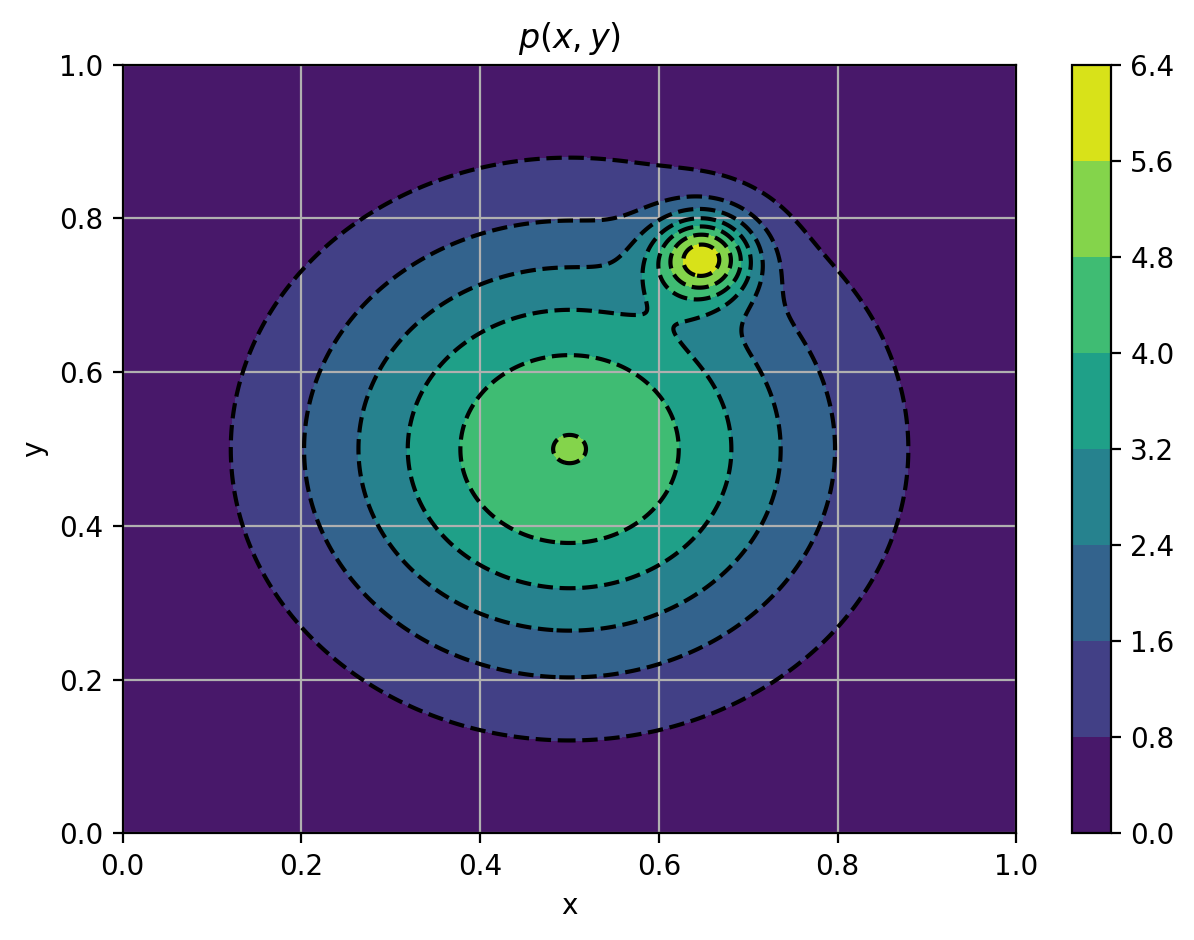

In [6]:
a1 = 4.82033
a2 = 4.43181
x1 = 0.5
y1 = 0.5
x2 = 0.65
y2 = 0.75
sigma1squared = 0.2 ** 2
sigma2squared = 0.04 ** 2

def p(x, y):
    arg1 = (x - x1) ** 2 + (y - y1) ** 2
    arg2 = (x - x2) ** 2 + (y - y2) ** 2
    return a1 * np.exp(-0.5 * arg1 / sigma1squared) + a2 * np.exp(-0.5 * arg2 / sigma2squared)

npoints = 1000
x = np.linspace(0, 1., npoints)
y = np.linspace(0, 1., npoints)
xx, yy = np.meshgrid(x, y)
zz = p(xx, yy)

# Contour plot
fig, ctrax = plt.subplots()
cs = ctrax.contourf(xx, yy, zz, cmap=plt.cm.viridis)
ctrax.contour(cs, colors='k', linestyles='dashed')
fig.colorbar(cs, ax=ctrax)
ctrax.set_title(r'$p(x,y)$')
ctrax.set_xlabel('x')
ctrax.set_ylabel('y')
ctrax.grid()
fig.tight_layout()

### b)

Em seguida, visualizamos a distribuição completa em uma projeção tridimensional:

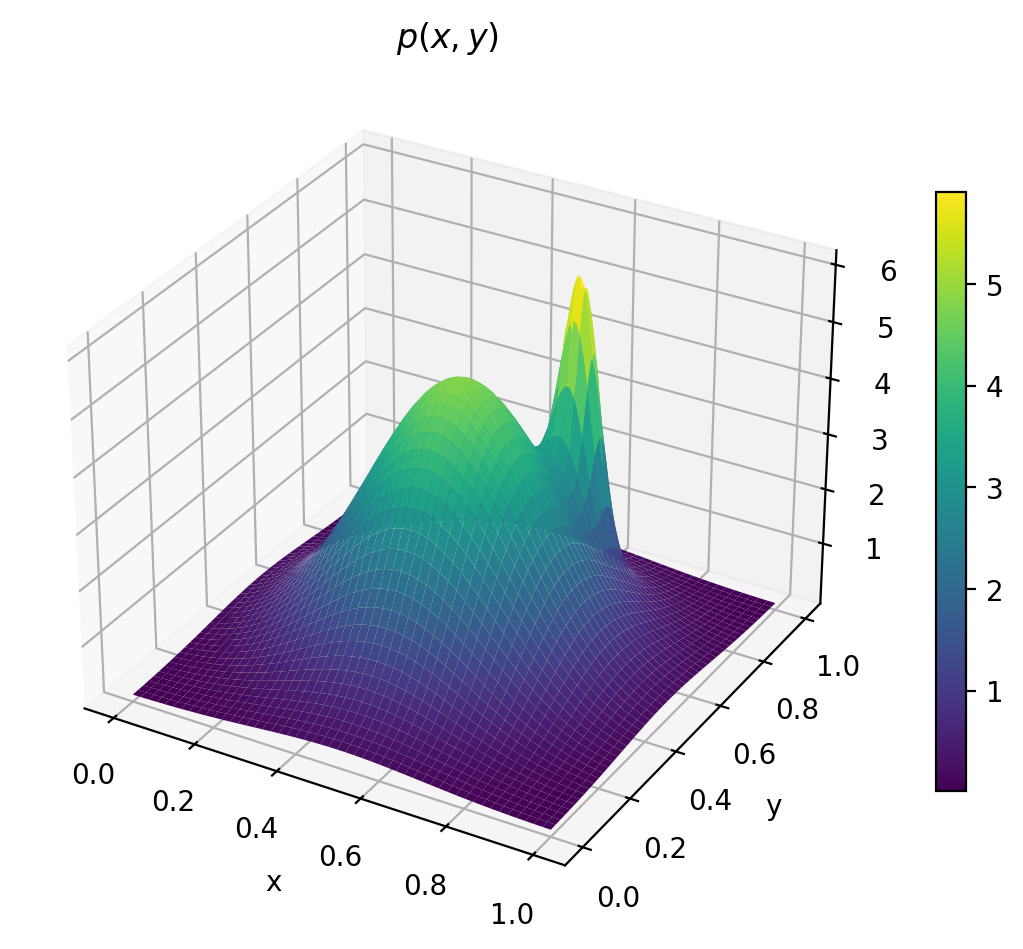

In [7]:
# Surface 3D plot
fig = plt.figure()
srfax = fig.add_subplot(projection='3d')
surf = srfax.plot_surface(xx, yy, zz, cmap=plt.cm.viridis)
fig.colorbar(surf, shrink=0.7)
srfax.set_xlabel('x')
srfax.set_ylabel('y')
srfax.set_title(r'$p(x,y)$')
fig.tight_layout()

### c)

As distribuições marginais $p(X|D,M,I)$ e $p(Y|D,M,I)$ são obtidas após marginalização de $p(X,Y|D,M,I)$ ao longo de um dos eixos. Observa-se também que a priori uniforme em $[0, 1]$ não precisa ser implementada explicitamente na prática.

Normalization: 1.00


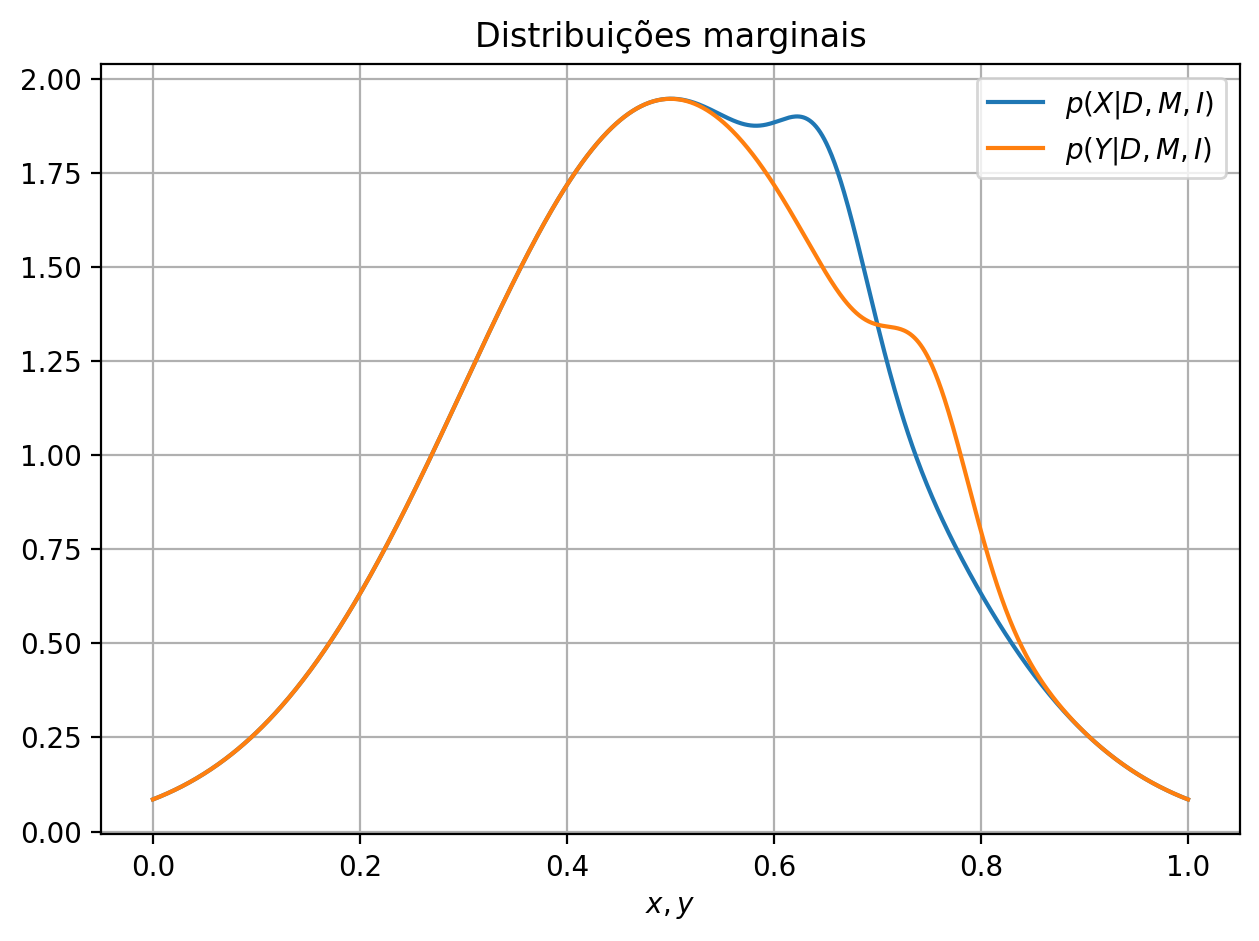

In [8]:
fig, ax = plt.subplots()
xmarg = normalize(np.trapz(zz, y, axis=0), x)
ymarg = normalize(np.trapz(zz, x, axis=-1), y)
print(f'Normalization: {np.trapz(xmarg, x):.2f}')
ax.plot(x, xmarg, label=r'$p(X|D,M,I)$')
ax.plot(y, ymarg, label=r'$p(Y|D,M,I)$')
ax.set_xlabel(r'$x, y$')
ax.set_title('Distribuições marginais')
ax.grid()
ax.legend()
fig.tight_layout()
plt.show()

### d)

A luz que está a uma distância muito grande do plano $z-x$ incidirá neste de maneira perpendicular. Portanto, a projeção resultante em $(x,z)$ será delimitada pelo valor máximo de $p(X,Y|D,M,I)\Big|_{X=x}$ ao longo de $y$. O mesmo raciocínio se aplica para a projeção no plano $(y,z)$. Visualizamos essas projeções nas curvas abaixo.

### e)

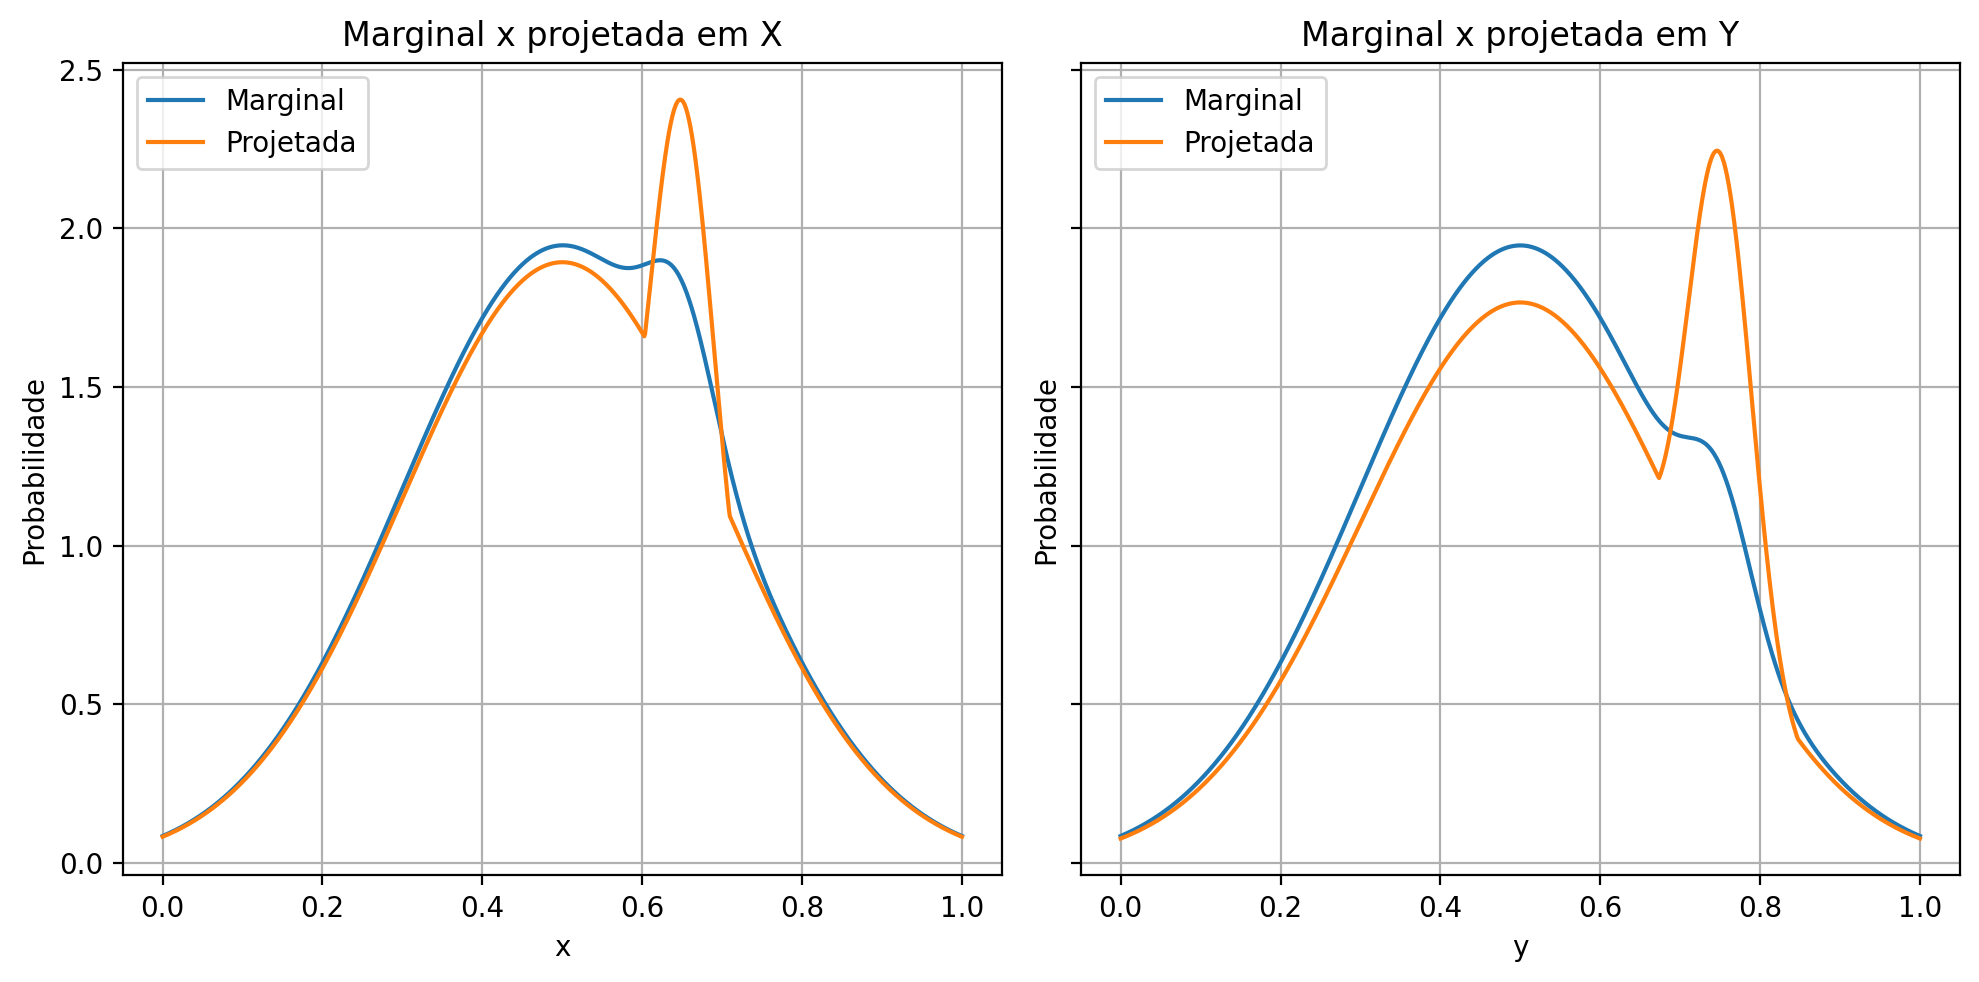

In [9]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
xproj = normalize(np.max(zz, axis=0), x)
yproj = normalize(np.max(zz, axis=-1), y)
xaxproj, yaxproj = axs
xaxproj.plot(x, xmarg, label="Marginal")
xaxproj.plot(x, xproj, label="Projetada")
xaxproj.set_xlabel('x')
xaxproj.set_title('Marginal x projetada em X')
yaxproj.plot(y, ymarg, label="Marginal")
yaxproj.plot(y, yproj, label="Projetada")
yaxproj.set_xlabel('y')
yaxproj.set_title('Marginal x projetada em Y')
for ax in axs:
    ax.grid()
    ax.legend(loc='upper left')
    ax.set_ylabel('Probabilidade')
fig.tight_layout()

plt.show()

## Questão 3

Primeiramente, vamos arbitrar que existem $N$ jogadores em campo nessa partida de futebol, e que eles podem fazer aniversário em $M$ dias do ano. Ao final, faremos os cálculos para o caso realista $(N,M) = (22, 365)$.

Atribuímos números de 1 a $N$ para cada jogador (não necessariamente os mesmos de suas camisas). Definimos a proposição $$E_i = \{\text{dos primeiros $i$ jogadores, nenhum faz aniversário na mesma data}\}.$$

Primeiramente, verificamos a consistência da definição dessas proposições. Notamos $\mathbb{P}(E_1) = 1$, e que $(E_j \Rightarrow E_i)$ se $i<j$, o que implica

\begin{align*}
\mathbb{P}(E_i, E_j) &= \mathbb{P}(E_i | E_j) \mathbb{P}(E_j)\\
                    &= \mathbb{P}(E_j).
\end{align*}

Assim, pode-se provar facilmente por indução que $\mathbb{P}(E_1,\ldots,E_n) = \mathbb{P}(E_n)$.

Inversamente, aplicamos o teorema de Bayes,

\begin{align*}
    \mathbb{P}(E_j) &= \frac{\mathbb{P}(E_j | E_i) \mathbb{P}(E_i)}{\mathbb{P}(E_i | E_j)}\\
                    &= \mathbb{P}(E_j | E_i) \mathbb{P}(E_i)
\end{align*}

Iterando esse raciocínio para pares consecutivos, $i = j - 1$, escrevemos $\mathbb{P}(E_j)$ em termos de um produto de probabilidades condicionais:

\begin{align*}
    \mathbb{P}(E_n) &= \mathbb{P}(E_1) \prod_{i=1}^{n} \mathbb{P}(E_{n + 1 - i} | E_{n - i})\\
                    &= \prod_{i=1}^{n} \mathbb{P}(E_{n + 1 - i} | E_{n - i})
\end{align*}

A probabilidade condicional $\mathbb{P}(E_n | E_{n-1})$ depende do jogador $n$ não fazer aniversário nas mesmas datas dos demais, dado que nenhuma destas coincide. Dessa maneira, assumindo uma probabilidade uniforme, o jogador $n$ tem exatamente $M - (n-1)$ datas possíveis. Portanto,

$$
\mathbb{P}(E_n | E_{n-1}) = \frac{M - n + 1}{M}
$$

Assim, podemos escrever

\begin{align*}
    \mathbb{P}(E_n) &= \prod_{i=1}^n \frac{M - i + 1}{M}\\
    &= \frac{1}{M^n} \frac{M!}{(M-n)!}\\
    &= \frac{n!}{M^n} \binom{M}{n}
\end{align*}

Finalmente, a probabilidade de que ao menos dois jogadores tenham o mesmo aniversário é dada por $$\mathbb{P}(\overline{E_n}) = 1 - \frac{n!}{M^n} \binom{M}{n}$$

Vamos visualizar essa probabilidade nas células abaixo.

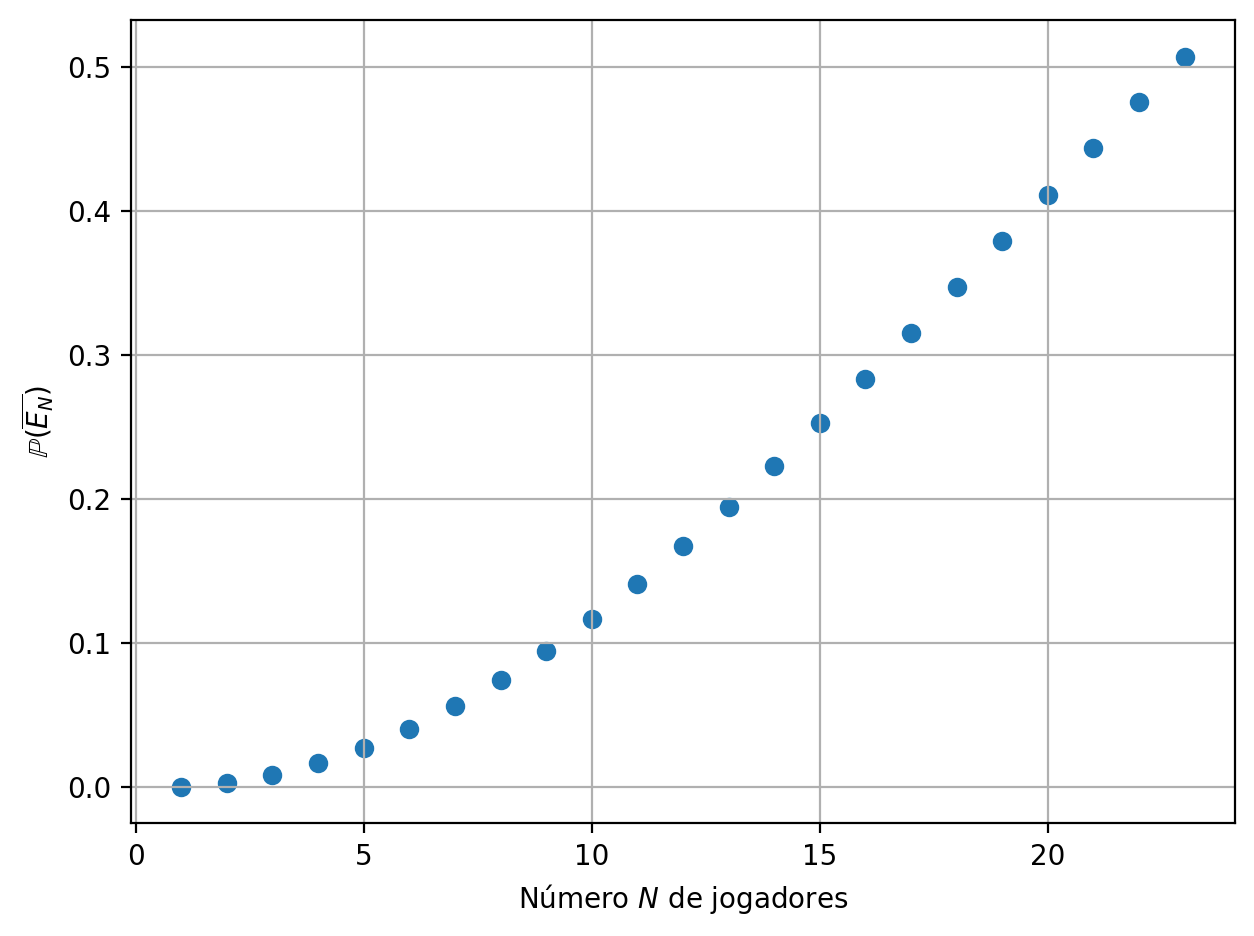

,Probabilidade
1,0.0
2,0.0027
3,0.0082
4,0.016
5,0.027
6,0.04
7,0.056
8,0.074
9,0.095
10,0.12


In [10]:
def same_birthday_prob(n, m):
    return 1 - factorial(n) * comb(m, n, exact=True) / m ** n

M = 365
N = 23
narr = np.arange(1, N + 1, dtype=np.int32)
probarr = np.array([same_birthday_prob(i, M) for i in range(1, N + 1)])

# Plot probabilities over n
fig, ax = plt.subplots()
ax.scatter(narr, probarr)

ax.set_xlabel(r'Número $N$ de jogadores')
ax.set_ylabel(r'$\mathbb{P}(\overline{E_N})$')
ax.grid()
fig.tight_layout()
plt.show()

# Print probabilities as a table
prob_df = pd.DataFrame(data=probarr, index=narr, columns=['Probabilidade'])
pd.options.display.float_format = '{:.2}'.format
display(prob_df)

Portanto, observamos que a probabilidade de que ao menos dois jogadores em uma partida de futebol compartilhem a mesma data de aniversário é de 48%. Ao incluir o juiz nesse cálculo, a probabilidade sobe para mais de 50%. Para essa probabilidade diminuir abaixo de 25%, é necessário que o número máximo de jogadores em campo seja 14, ou seja, é preciso que ao menos 8 jogadores sejam expulsos. Coincidentemente, esse é o exato número de expulsões que ocorreram no jogo de ida do confronto Grêmio x Internacional pela Libertadores de 2020, que terminou em 0x0.

## Questão 4

Seja $D_i$ o resultado após jogar o dado $i$. Nós vamos nos valer da hipótese de que cada lançamento dos dados é independente dos demais.

### a)

\begin{align*}
\mathbb{P}(D_1 \leq 3, D_2=5) &= \mathbb{P}(D_1 \leq 3)\mathbb{P}(D_2=5)\\
&= \frac{1}{2} \cdot \frac{1}{6}\\
&= \frac{1}{12}
\end{align*}

### b)

\begin{align*}
\mathbb{P}(D_1 + D_2 + D_3 = 16) &= \sum_{i=1}^{6} \mathbb{P}(D_1=i, D_2 + D_3 = 16 - i)\\
                                &= \sum_{i=1}^{6} \mathbb{P}(D_1=i | D_2 + D_3 = 16 - i)\mathbb{P}(D_2 + D_3 = 16 - i)\\
                                &= \sum_{i=1}^{6}  \sum_{i=j}^{6} \mathbb{P}(D_1=i)\mathbb{P}(D_2=j,D_3 = 16 - i - j)\\
                                &= \sum_{i=1}^{6}  \sum_{i=j}^{6} \mathbb{P}(D_1=i)\mathbb{P}(D_2=j|D_3 = 16 - i - j)\mathbb{P}(D_3 = 16 - i - j)\\
               &= \sum_{i=1}^{6}  \sum_{i=j}^{6} \mathbb{P}(D_1=i)\mathbb{P}(D_2=j)\mathbb{P}(D_3 = 16 - i - j)\\
\end{align*}

Notamos também que esse desenvolvemento pode ser generalizado para outros valores da soma dos dados além de 16.

In [11]:
def dice_prob(val, n):
    if val < 1 or val > n:
        return 0.
    return 1. / n

def two_die_sum(total, n):
    prob = 0
    for i in range(1, n + 1):
        prob += dice_prob(i, n) * dice_prob(total - i, n)
    return prob

def three_die_sum(total, n):
    prob = 0
    for i in range(1, n + 1):
        prob += dice_prob(i, n) * two_die_sum(total - i, n)
    return prob

def pretty_print(prob, limit_denominator):
    f = Fraction(prob).limit_denominator(limit_denominator)
    num, denom = f.as_integer_ratio()
    return f'{num}/{denom}' if num > 0 else '0'


ndice = 6
total_arr = np.arange(1, 3 * ndice + 1)
two_die_sum_arr = [pretty_print(two_die_sum(i, ndice), ndice ** 2) for i in total_arr]
three_die_sum_arr = [pretty_print(three_die_sum(i, ndice), ndice ** 3) for i in total_arr]

data = np.stack((two_die_sum_arr, three_die_sum_arr), dtype=str, axis=-1)
columns = ['Soma de dois dados', 'Soma de três dados']
die_pd = pd.DataFrame(data, dtype=str, index=total_arr, columns=columns)
display(die_pd)

,Soma de dois dados,Soma de três dados
1,0,0
2,1/36,0
3,1/18,1/216
4,1/12,1/72
5,1/9,1/36
6,5/36,5/108
7,1/6,5/72
8,5/36,7/72
9,1/9,25/216
10,1/12,1/8


### c)

\begin{align*}
\mathbb{P}(D_1 + D_2 + D_3 = 16 | D_1 = 5) &= \sum_{i=1}^{6} \mathbb{P}(D_1=i, D_2 + D_3 = 16 - i | D_1 = 5)\\
&= \sum_{i=1}^{6} \mathbb{P}(D_1=i | D_1 = 5) \mathbb{P}(D_2 + D_3 = 16 - i | D_1 = 5)\\
&= \sum_{i=1}^{6} \delta_{i,5} \mathbb{P}(D_2 + D_3 = 16 - i)\\
&= \mathbb{P}(D_2 + D_3 = 11)\\
&= \sum_{j=1}^{6}\mathbb{P}(D_2 =j, D_3 = 11 - j)\\
&= \sum_{j=1}^{6}\mathbb{P}(D_2 =j) \mathbb{P}(D_3 = 11 - j)\\
&= \frac{1}{18},
\end{align*}

conforme a tabela acima.

### d)

É preciso diferenciar se queremos obter a probabilidade de se obter ao menos dois dados com o mesmo valor, ou exatamente dois dados com o mesmo valor. Nesse último caso, exclui-se a possibilidade de que o valor do terceiro dado também coincida. Vamos ver os dois casos.
A probabilidade que o lançamento de $D_1$ e de $D_2$ dê o mesmo resultado é

\begin{align*}
\mathbb{P}(D_1 = D_2) &= \sum_{i=1}^{6} \mathbb{P}(D_1=i, D_2 = i)\\
&= \sum_{i=1}^{6} \mathbb{P}(D_1=i)\mathbb{P}(D_2 = i)\\
&= \sum_{i=1}^{6} \left(\frac{1}{6} \right)^2\\
&= 6 \left(\frac{1}{6} \right)^2\\
&= \frac{1}{6}\\
\end{align*}

Tem-se igualmente $\mathbb{P}(D_1 = D_3) = \mathbb{P}(D_2 = D_3) = \mathbb{P}(D_1 = D_2)$. Assim, 

$$\mathbb{P}(\text{ao menos dois dados com o mesmo valor}) = \mathbb{P}(D_1 = D_2 \cup D_1 = D_3 \cup D_2 = D_3)$$

Usamos o princípio de inclusão-exclusão:

\begin{align*}
\mathbb{P}(D_1 = D_2 \cup D_2 = D_3 \cup D_1 = D_3) =& \, \mathbb{P}(D_1 = D_2) + \mathbb{P}(D_1 = D_3) +\mathbb{P}(D_2 = D_3)\\
& - \mathbb{P}(D_1 = D_2, D_1 = D_3) - \mathbb{P}(D_1 = D_2, D_2 = D_3) - \mathbb{P}(D_1 = D_3, D_2 = D_3)\\ 
&+ \mathbb{P}(D_1 = D_2, D_1 = D_3, D_2 = D_3)\\
=& \, \mathbb{P}(D_1 = D_2) + \mathbb{P}(D_1 = D_3) +\mathbb{P}(D_2 = D_3)\\
&-3\mathbb{P}(D_1 = D_2 = D_3) +\mathbb{P}(D_1 = D_2 = D_3)\\
=&\, \mathbb{P}(D_1 = D_2) + \mathbb{P}(D_1 = D_3) +\mathbb{P}(D_2 = D_3) -2\mathbb{P}(D_1 = D_2 = D_3)\\
=&\, 3 \cdot \frac{1}{6} - 2 \cdot \frac{1}{36}\\
=&\, \frac{1}{2} -\frac{1}{18}\\
=&\, \frac{4}{9}\\
\end{align*}

Seria possível também calcular a probabilidade da proposição complementar,

\begin{align*}
\mathbb{P}(\text{nenhum dos dados possui o mesmo valor}) &= \mathbb{P}(D_1 \neq D_2 \neq D_3)\\
&= \sum_{i = 1}^6 \mathbb{P}(D_1 = i) \mathbb{P}(D_2 \neq D_3 \neq i)\\
&= \sum_{i = 1}^6 \sum_{j = 1}^6 \mathbb{P}(D_1 = i) \mathbb{P}(D_2 = j, D_2 \neq i, D_3 \neq i, D_3 \neq j)\\
&= \sum_{i = 1}^6 \sum_{j = 1}^6 \mathbb{P}(D_1 = i) \mathbb{P}(D_2 \neq i | D_2 = j)\mathbb{P}(D_2 = j) \mathbb{P} (D_3 \neq i, D_3 \neq j)\\
&= \sum_{i = 1}^6 \sum_{j = 1}^6 \mathbb{P}(D_1 = i)\mathbb{P}(D_2 = j) (1 - \delta_{i,j})\mathbb{P}(D_3 \neq i, D_3 \neq j)\\
&= \sum_{i = 1}^6 \sum_{j = 1}^6 \mathbb{P}(D_1 = i)\mathbb{P}(D_2 = j) (1 - \delta_{i,j})\mathbb{P}(D_3 \neq i, D_3 \neq j | i \neq j)\\
&= 2\sum_{i = 1}^6 \sum_{j > i}^6 \left(\frac{1}{6} \right)^2 \frac{4}{6}\\
&= 30 \cdot \frac{1}{36} \cdot \frac{4}{6}\\
&= \frac{5}{9},\\
\end{align*}

e portanto $\mathbb{P}(\overline{\text{nenhum dos dados possui o mesmo valor}}) = 4/9$.

Se incluirmos a restrição de que o valor de $D_3$ é diferente dos demais,

\begin{align*}
\mathbb{P}(D_1 = D_2 \neq D_3) &= \sum_{i=1}^{6} \mathbb{P}(D_1=i, D_2 = i, \overline{D_3 = i})\\
&= \sum_{i=1}^{6} \mathbb{P}(D_1=i)\mathbb{P}(D_2 = i)[1 - \mathbb{P}(D_3 = i)]\\
&= \sum_{i=1}^{6} \left(\frac{1}{6} \right)^2 \frac{5}{6}\\
&= 6 \left(\frac{1}{6} \right)^2 \frac{5}{6}\\
&= \frac{5}{36}\\
\end{align*}

Nesse caso, observa-se também que $\mathbb{P}(D_1 = D_2 \neq D_3,D_{\sigma(1)} = D_{\sigma(2)} \neq D_{\sigma(3)}) = 0$, onde $\sigma$ representa uma permutação cíclica dos dados. Essas duas proposições são mutuamente exclusivas porque elas implicam $D_i \neq D_i$, que possui probabilidade nula. Portanto,

\begin{align*}
\mathbb{P}(D_1 = D_2 \neq D_3 \cup D_1 = D_3 \neq D_2 \cup D_1 \neq D_2 = D_3) =& \, \mathbb{P}(D_1 = D_2 \neq D_3) + \mathbb{P}(D_1 = D_3 \neq D_2) +\mathbb{P}(D_1 \neq D_2 = D_3)\\
=&\, 3 \cdot \frac{5}{36}\\
=&\, \frac{5}{12}\\
\end{align*}

## Questão 5

Definimos as proposições

\begin{align*}
E_i &= \{ \text{O participante inicialmente escolhe a porta } i \}\\
A_i &= \{ \text{O apresentador abre a porta } i \}\\
P_i &= \{ \text{O prêmio está atrás da porta } i \}
\end{align*}

A probabilidade de interesse no problema é $\mathbb{P}(P_i | A_j, E_k)$, uma vez que essa é a relação causal entre as proposições: $E_k$, em seguida $A_j$ e por fim queremos saber a probabilidade  $P_i$. Usando o teorema de Bayes,

\begin{align*}
\mathbb{P}(P_i | A_j, E_k) &= \frac{\mathbb{P}(A_j| P_i, E_k) \mathbb{P}(P_i | E_k)}{\mathbb{P}(P_i| E_k)}\\
&= \frac{\mathbb{P}(A_j| P_i, E_k) \mathbb{P}(P_i | E_k)}{\sum_l \mathbb{P}(A_j| P_l, E_k)\mathbb{P}(P_l| E_k)}
\end{align*}

As probabilidades que aparecem do lado direito são mais fáceis de conectar às relações lógicas entre as proposições enunciadas. Vamos analisar cada uma delas. Primeiramente, o termo 

$$
\mathbb{P}(P_i| E_k) = \frac{1}{3},
$$

uma vez que a real localização do prêmio é decidida previamente antes do programa começar, e portanto é uniforme e não depende da escolha do participante. Assim, a probabilidade de interesse se reduz a

$$ \mathbb{P}(P_i | A_j, E_k) = \frac{\mathbb{P}(A_j| P_i, E_k)}{\sum_l \mathbb{P}(A_j| P_l, E_k)}$$

Nesse momento é importante descartar algumas situações incongruentes. Por exemplo, $\mathbb{P}(A_i | E_i) = 0$, uma vez que o apresentador não vai abrir a porta que o participante escolheu. Similarmente, $\mathbb{P}(A_i | P_i) = 0$, pois o apresentador abre uma porta que não contém o prêmio. Para facilitar a notação, vamos fixar que o participante escolhe a primeira porta, e que o apresentador abre a segunda porta. Assim, o prêmio só pode estar atrás da primeira ou da terceira porta:

$$ \mathbb{P}(P_i | A_2, E_1) = \frac{\mathbb{P}(A_2| P_i, E_1)}{\mathbb{P}(A_2| P_1, E_1) + \mathbb{P}(A_2| P_3, E_1)}$$

Portanto, basta calcular as probabilidades $\mathbb{P}(A_2| P_1, E_1)$ e $\mathbb{P}(A_2| P_3, E_1)$:

- No primeiro caso, $A_2 | P_1, E_1$, tanto a segunda como a terceira porta não contêm o prêmio, e o apresentador pode escolher abrir qualquer uma delas, o que implica $\mathbb{P}(A_2 | P_1, E_1) = 1/2$;
- No segundo caso, $A_2 | P_3, E_1$, o apresentador só pode abrir a segunda porta, o que implica $\mathbb{P}(A_2 | P_3, E_1) = 1$.

Conclui-se que

$$ \mathbb{P}(P_1 | A_2, E_1) = 1/3, \, \mathbb{P}(P_3 | A_2, E_1) = 2/3, $$

ou seja, é de fato vantajoso para o participante mudar a sua escolha: as suas chances de ganhar o prêmio são dobradas!

Esse resultado parece contra-intuitivo. É evidente que, independente da escolha do participante, uma das portas restantes não conterá o prêmio. Portanto, à primeira vista, a revelação do apresentador não parece impactar as probabilidades do prêmio estar atrás de cada porta ainda fechada - ela parece não aportar nenhuma informação adicional. No entanto, as opções do apresentador não são simétricas às condições de 1) o participante escolheu a porta certa e 2) o participante escolheu a porta errada. Levar em conta essa diferença é fundamental para entender o resultado do problema, este que é eficientemente esclarecido por uma abordagem bayesiana.

# Questões 6 e 7

Vamos carregar e visualizar os dados:

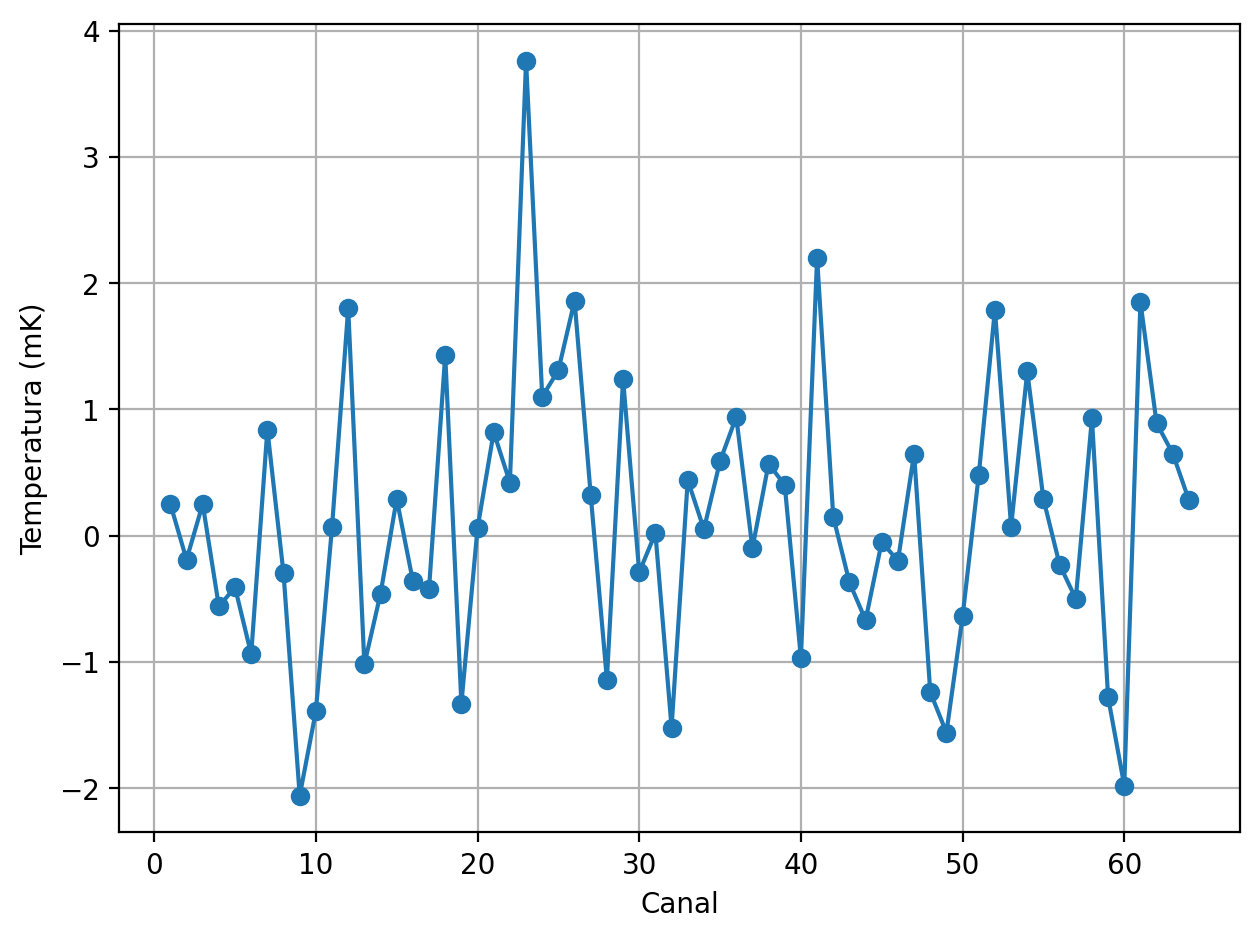

In [12]:
dtypes = {'Canal': np.int32, 'Temperatura': np.float64}
data = pd.read_csv('../data/pb1/q7.csv', header=None, index_col='Canal', names=dtypes.keys(), dtype=dtypes)
fig, ax = plt.subplots()
nchannels = data.shape[0]
channels = np.arange(1, nchannels + 1)
tmeasured = data['Temperatura']
ax.plot(channels, tmeasured, '-o')
ax.set_ylabel('Temperatura (mK)')
ax.set_xlabel('Canal')
ax.grid()
fig.tight_layout()
plt.show()

A a hipótese do modelo $M_1$ é que o sinal verdadeiro tem forma gaussiana e está centrado no canal $\nu = 24$. Escrevemos o sinal como

$$ s(\nu, T) = T \exp \left\{-\frac{1}{2} \left( \frac{\nu - \nu_0}{\sigma_L} \right)^2 \right\},$$

onde $T$ é a força do sinal e é um parâmetro livre da teoria e $\sigma_L = 2$.

Já o modelo alternativo $M_2$ diz que não há sinal, e as flutuações vistas nos dados são exclusivamente ruído. O ruído em ambos os casos é distribuído normalmente com uma variância $\sigma_K^2 = 1 \, \text{mK}^2$.

In [13]:
sigmal = 2.
sigmak = 1.
npoints = 10000
Tmin, Tmax = 0.1, 100
logTmin, logTmax = -1, 2

def signal(nu, nutrue, T):
    return T * np.exp(-0.5 * (nu - nutrue) ** 2 / sigmal ** 2)

Tarr = np.linspace(Tmin, Tmax, npoints, dtype=np.float64)
nutrue = 24

# Different priors
loglike_signal = 0.
loglike_no_signal = 0.
for channel, d in zip(channels, tmeasured):
    s = signal(channel, nutrue, Tarr)
    loglike_signal += loggaussian(s, d, sigmak)
    loglike_no_signal += loggaussian(0., d, sigmak)

logposterior_uniform = loglike_signal + np.log(uniform_prior(Tarr, Tmin, Tmax))
logposterior_jeffreys = loglike_signal + np.log(jeffreys_prior(Tarr, Tmin, Tmax))
posterior_uniform = np.exp(logposterior_uniform)
posterior_jeffreys = np.exp(logposterior_jeffreys)
evidence_uniform = np.trapz(posterior_uniform, Tarr)
evidence_jeffreys = np.trapz(posterior_jeffreys, Tarr)
evidence_no_signal = np.exp(loglike_no_signal)

# Evidences
print(f'Evidence with uniform prior: {evidence_uniform:.3e}')
print(f'Evidence with Jeffreys prior: {evidence_jeffreys:.3e}')
print(f'Evidence for model M2: {evidence_no_signal:.3e}')

## Occam factors
occam_uniform = evidence_uniform / np.max(np.exp(loglike_signal))
occam_jeffreys = evidence_jeffreys / np.max(np.exp(loglike_signal))
print(f'Occam factor with uniform prior: {occam_uniform:.3}')
print(f'Occam factor with Jeffreys prior: {occam_jeffreys:.3}')

# Odds ratios
uniform_odds = evidence_uniform / evidence_no_signal
jeffreys_odds = evidence_jeffreys / evidence_no_signal
prob_m1_uniform = 1 / (1 + 1 / uniform_odds)
prob_m1_jeffreys = 1 / (1 + 1 / jeffreys_odds)
txt = r'\text{Uniform prior: odds }= ' + r'{:.2f}, \,'.format(uniform_odds) 
txt += r'\mathbb{P}(M_1 | D, I) = ' + r'{:.2f}'.format(prob_m1_uniform)
display(Math(txt))
txt = r'\text{Jeffreys prior: odds }= ' + r'{:.2f}, \,'.format(jeffreys_odds) 
txt += r'\mathbb{P}(M_1 | D, I) = ' + r'{:.2f}'.format(prob_m1_jeffreys)
display(Math(txt))

Evidence with uniform prior: 5.490e-41
Evidence with Jeffreys prior: 4.275e-40
Evidence for model M2: 2.817e-42
Occam factor with uniform prior: 0.0133
Occam factor with Jeffreys prior: 0.104


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Quantitativamente, observa-se que a razão das probablidades $\mathbb{P}(M_1 | D, I) / \mathbb{P}(M_2 | D, I)$ é cerca de oito vezes maior assumindo a priori de Jeffreys do que assumindo uma priori uniforme. Conceitualmente, a priori de Jeffreys também parece ser uma escolha mais adequada para o largo intervalo de $T \in [0.1, 100] \, \text{mK}$, dado que não temos informação sobre a ordem de magnitude da força $T$ do sinal. Com efeito, o fator de Occam penaliza a priori uniforme aproximadamente 10 vezes mais por ter um maior volume do espaço de parâmetros que não mostra forte compatibilidade com os dados. 

Em seguida, vamos traçar as distribuições para o parâmetro $T$ e calcular o Highest Density Intervel (HDI) à 95% para ambas as escolhas de distribuição priori.

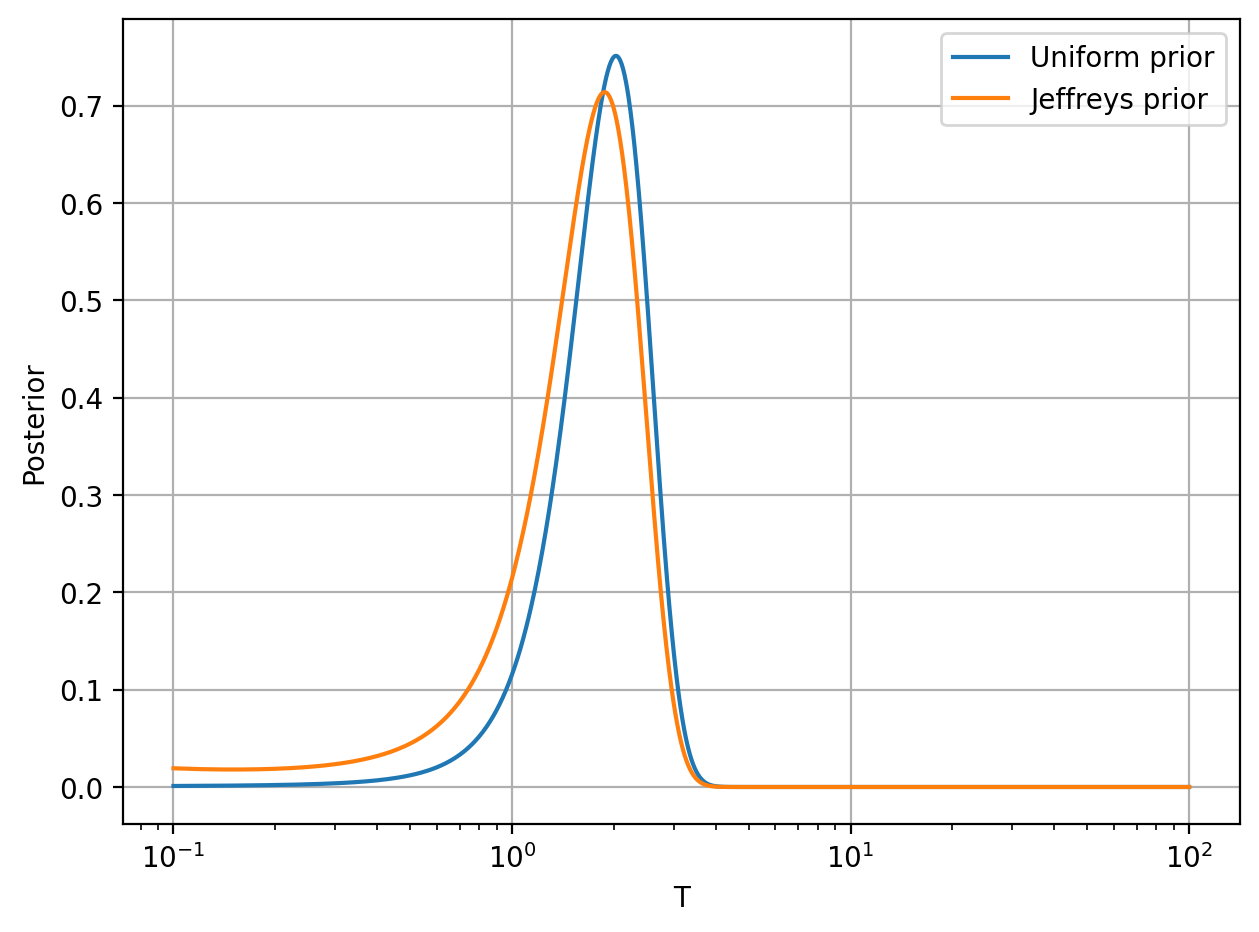

In [14]:
# Plotting posteriors for each prior
posterior_uniform = normalize(posterior_uniform, Tarr)
posterior_jeffreys = normalize(posterior_jeffreys, Tarr)
fig, ax = plt.subplots()
ax.plot(Tarr, posterior_uniform, label='Uniform prior')
ax.plot(Tarr, posterior_jeffreys, label='Jeffreys prior')
ax.set_xscale('log')
#ax.set_xlim([0., 5.])
ax.set_xlabel('T')
ax.set_ylabel('Posterior')
ax.grid()
ax.legend()
fig.tight_layout()
plt.show()

In [15]:
def hdi(pdf, x, alpha):
    """
    Compute the alpha-Highest Density Interval (HDI) of a given pdf along the array x.
    """
    # Use cdf: monotonic in [0,1]
    cdf = cumulative_trapezoid(pdf, x=x)
    # Get index i for which cdf[i] = alpha
    median, l = np.searchsorted(cdf, [0.5, alpha])
    n = len(cdf)
    # Minimal length of interval
    minl = l
    # Index for low-end of minimal-length interval
    mini = 0
    maxalpha = cdf[mini + minl] - cdf[minl]
    for i in range(1, n):
        # At the start of the loop i is increased by 1
        # but high-end point is kept fixed, therefore decrease l by 1
        l = minl - 1
        alphai = cdf[i + l] - cdf[i]
        # Increase l until the interval [i, i + l] encloses the desired CI
        while alphai < alpha and l <= minl:
            l += 1
            if i + l >= n:
                # If this condition is met, i is already too high
                # and we can terminate
                # Return median and hdi values in x
                return x[median], x[mini], x[mini + minl]

            alphai = cdf[i + l] - cdf[i]
            if l > minl:
                # Not worth increasing interval if it already non-maximal
                break
        if l < minl or l == minl and alphai > maxalpha:
            minl = l
            mini = i
            maxalpha = alphai

tmedian, tlow, thigh = hdi(posterior_uniform, Tarr, 0.95)
txt = r'\text{Uniform prior: } T = ' + r'{0:.2f}_{{-{1:.2f}}}^{{{2:.2f}}}'.format(tmedian, tmedian - tlow, thigh - tmedian)
display(Math(txt))

tmedian, tlow, thigh = hdi(posterior_jeffreys, Tarr, 0.95)
txt = r'\text{Jeffreys prior: } T = ' + r'{0:.2f}_{{-{1:.2f}}}^{{{2:.2f}}}'.format(tmedian, tmedian - tlow, thigh - tmedian)
display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Estudamos em seguida o impacto de promover $\nu$ a parâmetro livre do modelo. Encontramos as distribuições posterioris em $T$ marginalizando a distribuição bi-dimensional ao longo da priori uniforme $\nu \in [1, 50]$. Para facilitar a visualização, tratamos $\nu$ como uma variável contínua.

In [16]:
numin, numax = 1, 50
nupoints = 1000
nuarr = np.linspace(numin, numax, nupoints)
#nuarr = np.arange(numin, numax + 1)
numesh, Tmesh = np.meshgrid(nuarr, Tarr)

# Different priors
loglike_signal = 0.
for channel, d in zip(channels, tmeasured):
    s = signal(channel, numesh, Tmesh)
    loglike_signal += loggaussian(s, d, sigmak)

lognu_prior = np.log(uniform_prior(numesh, numin, numax))
log2dim_posterior_uniform = loglike_signal + np.log(uniform_prior(Tmesh, Tmin, Tmax)) + lognu_prior
log2dim_posterior_jeffreys = loglike_signal + np.log(jeffreys_prior(Tmesh, Tmin, Tmax)) +  lognu_prior
twodim_posterior_uniform = np.exp(log2dim_posterior_uniform)
twodim_posterior_jeffreys = np.exp(log2dim_posterior_jeffreys)

t_uniform = np.trapz(twodim_posterior_uniform, nuarr, axis=-1)
#t_uniform = np.sum(twodim_posterior_uniform, axis=-1)
evidence_uniform = np.trapz(t_uniform, Tarr)

t_jeffreys = np.trapz(twodim_posterior_jeffreys, nuarr, axis=-1)
#t_jeffreys = np.sum(twodim_posterior_jeffreys, axis=-1)
evidence_jeffreys = np.trapz(t_jeffreys, Tarr)

uniform_odds = evidence_uniform / evidence_no_signal
jeffreys_odds = evidence_jeffreys / evidence_no_signal
prob_m1_uniform = 1 / (1 + 1 / uniform_odds)
prob_m1_jeffreys = 1 / (1 + 1 / jeffreys_odds)
txt = r'\text{Uniform prior: odds }= ' + r'{:.2f}, \,'.format(uniform_odds) 
txt += r'\mathbb{P}(M_1 | D, I) = ' + r'{:.2f}'.format(prob_m1_uniform)
display(Math(txt))
txt = r'\text{Jeffreys prior: odds }= ' + r'{:.2f}, \,'.format(jeffreys_odds) 
txt += r'\mathbb{P}(M_1 | D, I) = ' + r'{:.2f}'.format(prob_m1_jeffreys)
display(Math(txt))

## Occam factors
occam_uniform = evidence_uniform / np.max(np.exp(loglike_signal))
occam_jeffreys = evidence_jeffreys / np.max(np.exp(loglike_signal))
print(f'Occam factor with uniform prior: {occam_uniform:.3}')
print(f'Occam factor with Jeffreys prior: {occam_jeffreys:.3}')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Occam factor with uniform prior: 0.00048
Occam factor with Jeffreys prior: 0.00407


Observamos que, ao marginalizar também na linha de frequência $\nu$, estamos integrando sobre o volume total do nosso espaço de parâmetros que é agora bidimensional. Dessa maneira, a fração de volume em que o sinal é mais compatível com os dados é significativamente menor do que o primeiro caso estudado, em que $\nu_0$ foi mantido fixo. O aumento da região desse volume de baixa probabilidade penaliza o modelo $M_1$. Com efeito, observamos uma redução em $\mathbb{P}(M_1 | D, I)$ em ambos os casos. Em particular, a escolha de priori uniforme em $T$ é mais penalizada por dar um peso maior para a década superior no intervalo considerado para $T \in [0.1, 100] \, \text{mK}$. 

Em seguida, nos voltamos ao problema de estimar os parâmetros do modelo. Calculamos e visualizamos as distribuições marginalizadas e normalizadas, comparando-as com as posterioris em $T$ calculadas supondo $\nu_0$ fixo:

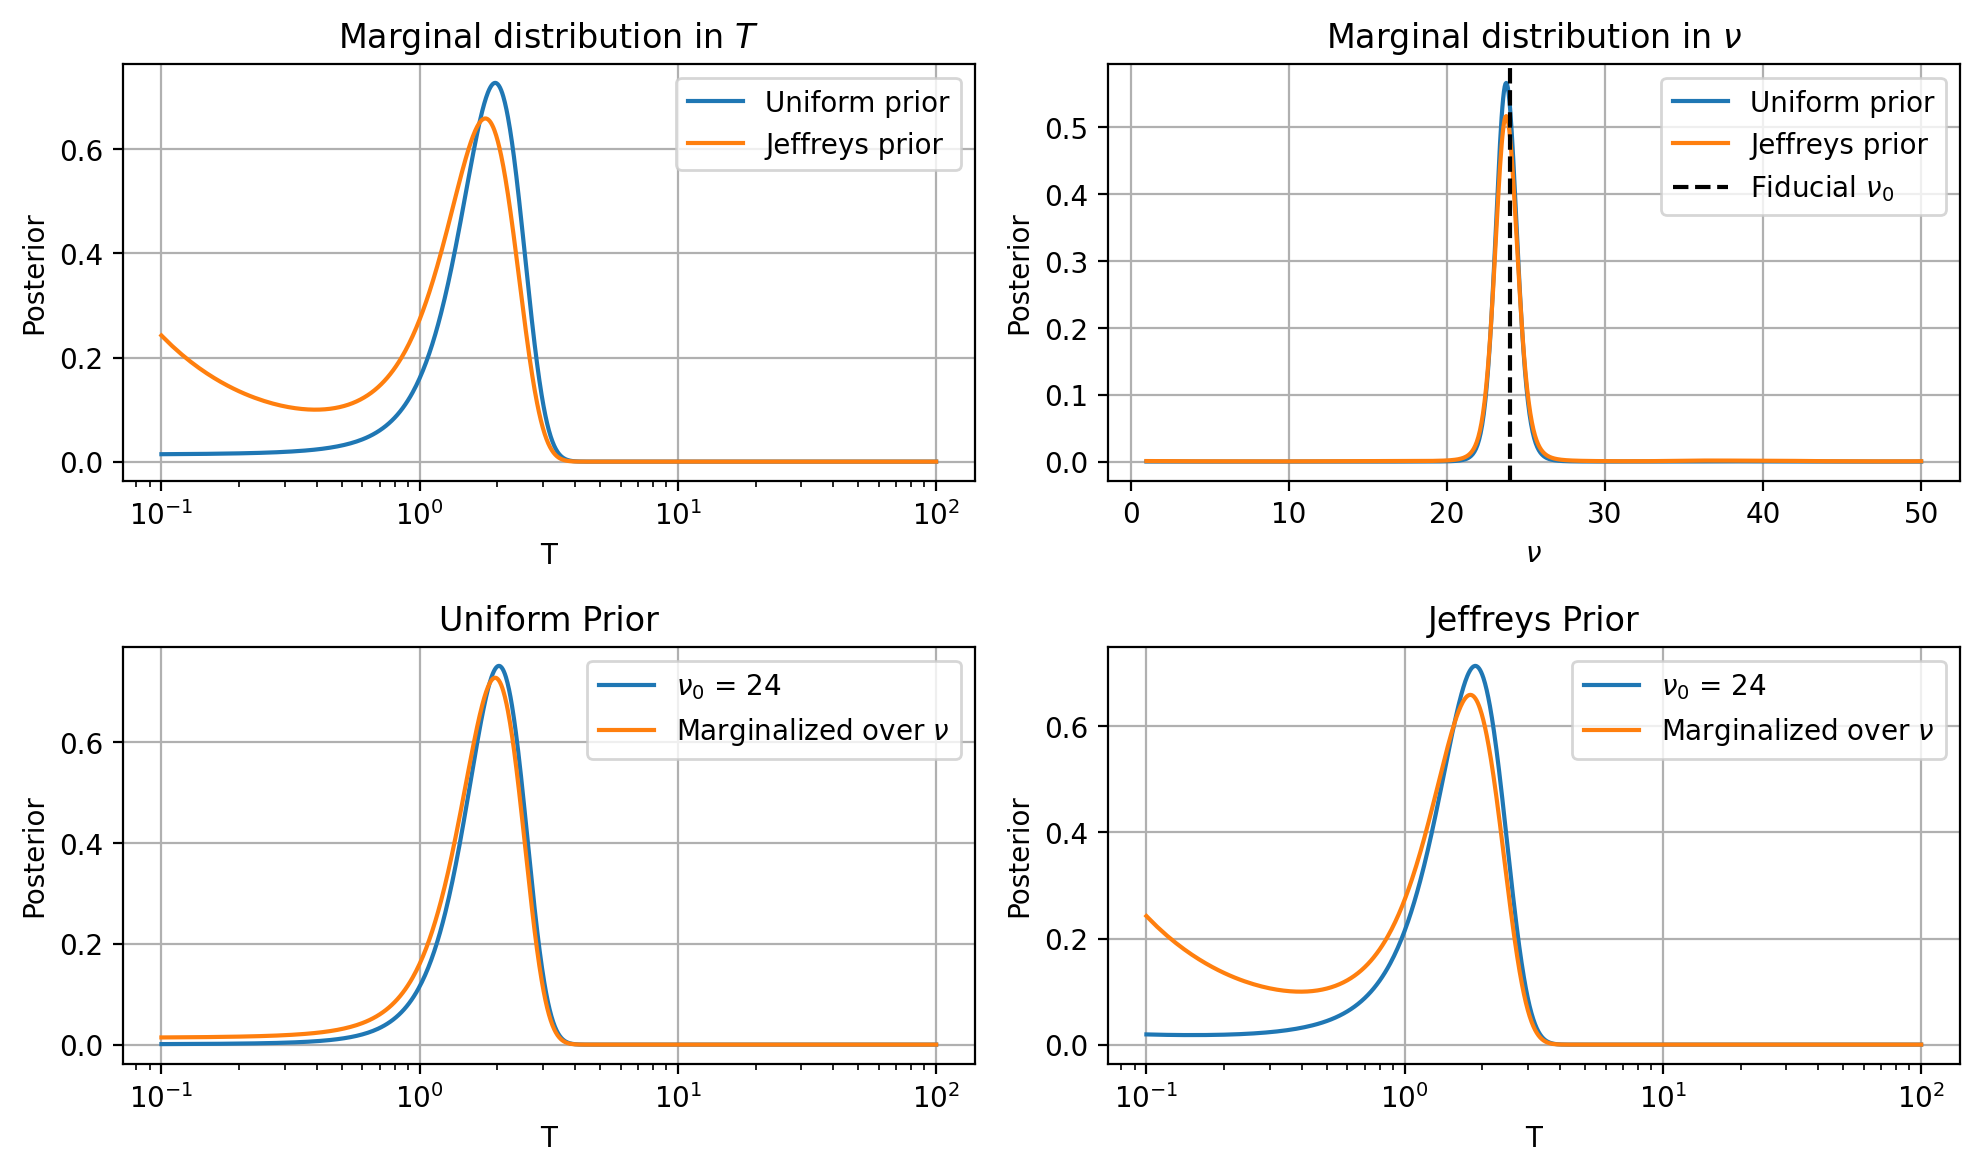

In [17]:
marginalizedt_uniform = normalize(t_uniform, Tarr)
marginalizedt_jeffreys = normalize(t_jeffreys, Tarr)

marginalizednu_uniform = normalize(np.trapz(twodim_posterior_uniform, Tarr, axis=0), nuarr)
marginalizednu_jeffreys = normalize(np.trapz(twodim_posterior_jeffreys, Tarr, axis=0), nuarr)

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
# Plotting marginalized posteriors for each parameter
# T
ax = axs[0][0]
ax.plot(Tarr, marginalizedt_uniform, label='Uniform prior')
ax.plot(Tarr, marginalizedt_jeffreys, label='Jeffreys prior')
ax.set_xscale('log')
ax.set_xlabel('T')
ax.set_ylabel('Posterior')
ax.set_title(r'Marginal distribution in $T$')
ax.grid()
ax.legend()
# nu
ax = axs[0][1]
ax.plot(nuarr, marginalizednu_uniform, label='Uniform prior')
ax.plot(nuarr, marginalizednu_jeffreys, label='Jeffreys prior')
ax.axvline(nutrue, c='k', ls='--', label=r'Fiducial $\nu_0$')
ax.set_xlabel(r'$\nu$')
ax.set_ylabel('Posterior')
ax.set_title(r'Marginal distribution in $\nu$')
ax.grid()
ax.legend()

# Comparing marginalized x fixed nu0 for uniform prior
ax = axs[1][0]
ax.plot(Tarr, posterior_uniform, label=r'$\nu_0$ = {}'.format(nutrue))
ax.plot(Tarr, marginalizedt_uniform, label=r'Marginalized over $\nu$')
ax.set_xscale('log')
ax.set_xlabel('T')
ax.set_ylabel('Posterior')
ax.set_title('Uniform Prior')
ax.grid()
ax.legend()

# Comparing marginalized x fixed nu0 for Jeffreys prior
ax = axs[1][1]
ax.plot(Tarr, posterior_jeffreys, label=r'$\nu_0$ = {}'.format(nutrue))
ax.plot(Tarr, marginalizedt_jeffreys, label=r'Marginalized over $\nu$')
ax.set_xscale('log')
ax.set_xlabel('T')
ax.set_ylabel('Posterior')
ax.set_title('Jeffreys Prior')
ax.grid()
ax.legend()

fig.tight_layout()
plt.show()

As duas figuras inferiores ilustram o efeito da marginalização em $\nu$ de aumentar a dispersão na probabilidade marginal em $T$, como esperado. Ao mesmo tempo, a figura superior direita mostra que o sinal é bem localizado em $\nu$. Com efeito, a localização é precisa o suficiente para não alargar significativamente a distribuição em $T$ no caso de priori uniforme. Em ambos os casos, a marginalização em $\nu$ favorece a década inferior em $T$, deslocando a moda para a esquerda, uma vez que a escolha de $\nu$ longe do valor fiducial esperado diminui a razão sinal/ruído (favorecendo $T$ pequeno). No caso da priori de Jeffreys, em que as décadas inferior e superior de $T$ contribuem igualmente para o volume do espaço de parâmetros, observa-se um aumento na cauda inferior da distribuição posteriori de $T$. 

Calculamos agora o 95% HDI para as posterioris marginalizadas em $\nu$:

In [18]:
tmedian, tlow, thigh = hdi(marginalizedt_uniform, Tarr, 0.95)
txt = r'\text{Uniform prior: } T = ' + r'{0:.2f}_{{-{1:.2f}}}^{{{2:.2f}}}'.format(tmedian, tmedian - tlow, thigh - tmedian)
display(Math(txt))

tmedian, tlow, thigh = hdi(marginalizedt_jeffreys, Tarr, 0.95)
txt = r'\text{Jeffreys prior: } T = ' + r'{0:.2f}_{{-{1:.2f}}}^{{{2:.2f}}}'.format(tmedian, tmedian - tlow, thigh - tmedian)
display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>